In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpectancy_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [3]:
lifeexpectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
lifeexpectancy_df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
for column_name in lifeexpectancy_df.columns:
    print("Unique values in column {} are: {}".format(column_name, lifeexpectancy_df[column_name].unique()))

Unique values in column Country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [6]:
lifeexpectancy_df.isnull().sum()*100/lifeexpectancy_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [7]:
fill_list = ["Life expectancy ", "Adult Mortality", "Alcohol",
             "Hepatitis B", " BMI ", "Polio",
             "Total expenditure", "Diphtheria ",
             "GDP", " thinness  1-19 years", " thinness 5-9 years",
             "Income composition of resources", "Schooling"]

countries = lifeexpectancy_df["Country"].unique()

for country in countries:
    lifeexpectancy_df.loc[lifeexpectancy_df["Country"] == country, fill_list] = lifeexpectancy_df.loc[lifeexpectancy_df["Country"] == country, fill_list].interpolate()

lifeexpectancy_df.dropna(inplace=True)

The interpolate method of filling missing data was chosen to fill in missing data for these analysis over measures of central tendency (i.e. mean, median, mode) because this data set consisted of time series data.

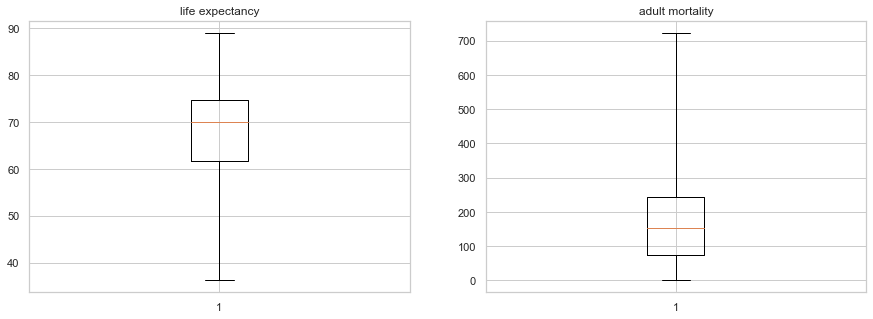

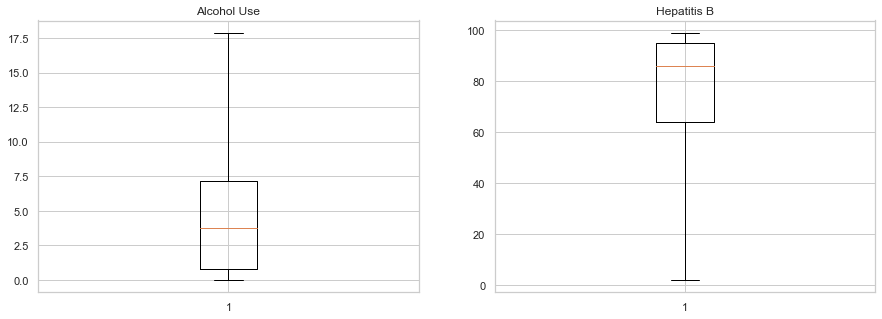

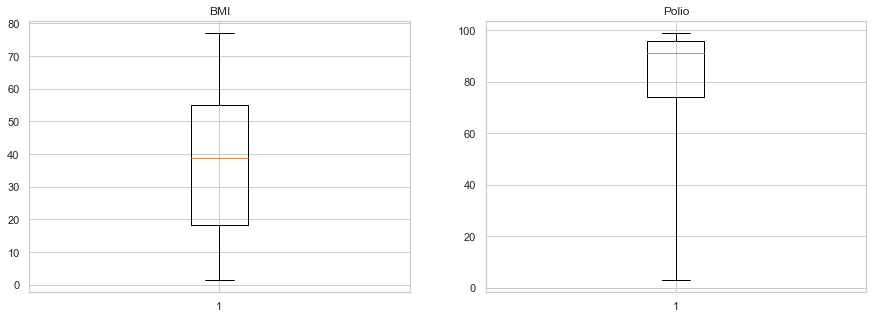

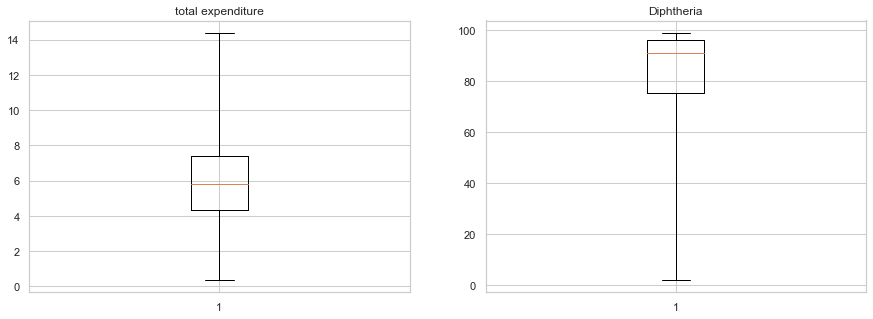

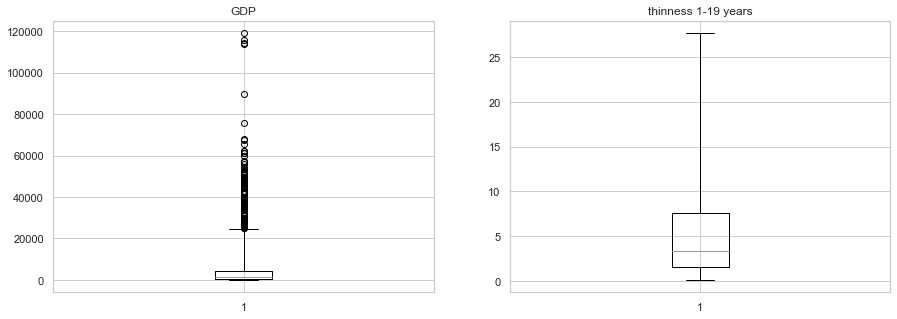

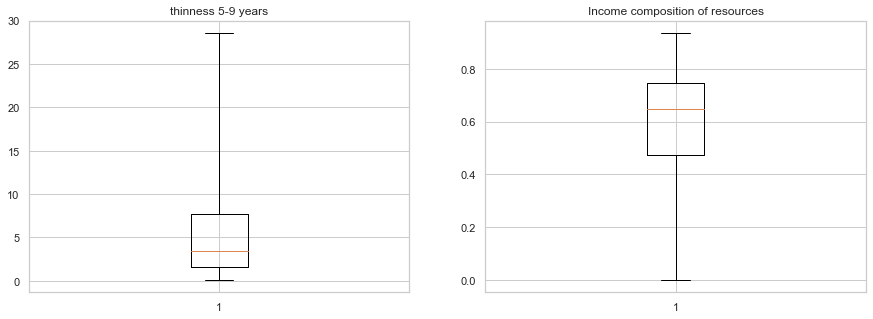

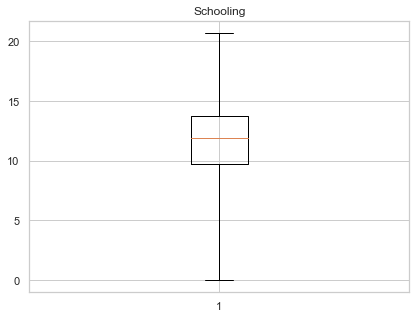

In [8]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(lifeexpectancy_df["Life expectancy "], whis = 5)
plt.title("life expectancy")

plt.subplot(1,2,2)
plt.boxplot(lifeexpectancy_df["Adult Mortality"], whis = 5)
plt.title("adult mortality")
plt.show()

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(lifeexpectancy_df["Alcohol"], whis = 5)
plt.title("Alcohol Use")

plt.subplot(1,2,2)
plt.boxplot(lifeexpectancy_df["Hepatitis B"], whis = 5)
plt.title("Hepatitis B")
plt.show()

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(lifeexpectancy_df[" BMI "], whis = 5)
plt.title("BMI")

plt.subplot(1,2,2)
plt.boxplot(lifeexpectancy_df["Polio"], whis = 5)
plt.title("Polio")
plt.show()

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(lifeexpectancy_df["Total expenditure"], whis = 5)
plt.title("total expenditure")

plt.subplot(1,2,2)
plt.boxplot(lifeexpectancy_df["Diphtheria "], whis = 5)
plt.title("Diphtheria")
plt.show()
          
plt.figure(figsize = (15,5))
    
plt.subplot(1,2,1)
plt.boxplot(lifeexpectancy_df["GDP"], whis = 5)
plt.title("GDP")

plt.subplot(1,2,2)
plt.boxplot(lifeexpectancy_df[" thinness  1-19 years"], whis = 5)
plt.title("thinness 1-19 years")
plt.show()

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(lifeexpectancy_df[" thinness 5-9 years"], whis = 5)
plt.title("thinness 5-9 years")

plt.subplot(1,2,2)
plt.boxplot(lifeexpectancy_df["Income composition of resources"], whis = 5)
plt.title("Income composition of resources")
plt.show()
          
plt.figure(figsize = (15,5))
    
plt.subplot(1,2,1)
plt.boxplot(lifeexpectancy_df["Schooling"], whis = 5)
plt.title("Schooling")
plt.show()

The boxplots above were the method I chose to detect outliers among the numerical variables in this data set. The only variable were outliers were detected using this method was GDP. In order to prevent the outliers in the GDP variable from skewing the data with regards to life expectancy, I will winsorize the GDP variable in order to eliminate the outliers in this variable.

In [9]:
from scipy.stats.mstats import winsorize

winsorized_GDP = winsorize(lifeexpectancy_df["GDP"], (0, 0.10))

Text(0.5, 1.0, 'Box plot of winsorized GDP')

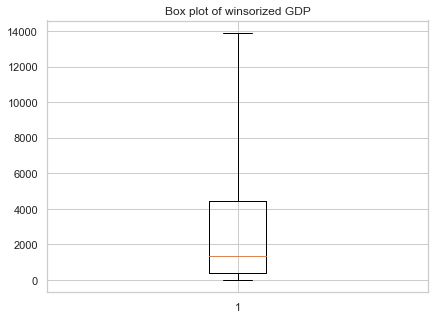

In [10]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_GDP, whis = 5)
plt.title("Box plot of winsorized GDP")

Discuss outlier effects

In [11]:
lifeexpectancy_df['winsorized_GDP'] = winsorized_GDP

In [12]:
lifeexpectancy_df.describe(include= 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,winsorized_GDP
count,1987,1987.000000,1987,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
unique,133,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.984902,NaN,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,...,5.902728,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054,3397.760537
std,NaN,4.323147,NaN,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,...,2.287467,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964,4367.055192
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,...,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,1.681350
25%,NaN,2003.000000,NaN,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,...,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000,384.553107
50%,NaN,2007.000000,NaN,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,...,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000,1334.651896
75%,NaN,2011.000000,NaN,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,...,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000,4441.530655


Text(0.5, 1.0, 'histogram of GDP (Log Transformed)')

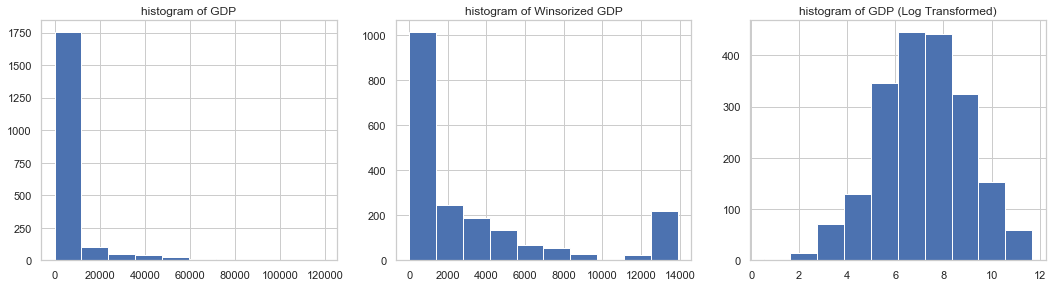

In [13]:
import numpy as np
plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(lifeexpectancy_df["GDP"])
plt.title("histogram of GDP")

plt.subplot(3, 3, 2)
plt.hist(lifeexpectancy_df["winsorized_GDP"])
plt.title("histogram of Winsorized GDP")

plt.subplot(3, 3, 3)
plt.hist(np.log(lifeexpectancy_df["GDP"]))
plt.title("histogram of GDP (Log Transformed)")

GDP is one variable that could be inferred to influence life expectancy. The results of the histograms above show that both our raw GDP and winzorized GDP variables are both skewed. One way to eliminate this skewed distribution would be to log transform the original GDP values.

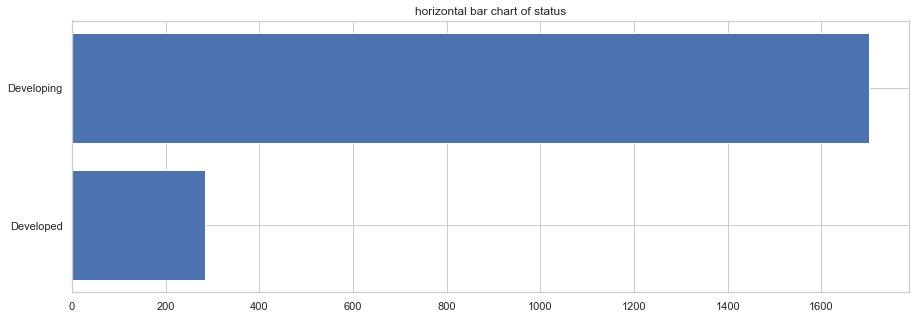

In [31]:
plt.figure(figsize=(15,5))
plt.barh(lifeexpectancy_df.groupby("Status")["Status"].count().index, 
        lifeexpectancy_df.groupby("Status")["Status"].count())
plt.title("horizontal bar chart of status")

plt.show()

This graph shows that there are more observations of developing countries in this data set than observations of developed countries.

In [14]:
lifeexpectancy_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,winsorized_GDP
Year,1.000000,0.171485,-0.072108,-0.037601,-0.046859,0.089096,0.247259,-0.099554,0.096059,-0.042479,...,0.074139,0.166006,-0.142581,0.119355,0.022775,-0.047477,-0.053483,0.242900,0.225046,0.179852
Life expectancy,0.171485,1.000000,-0.660529,-0.160922,0.392617,0.413683,0.249625,-0.138133,0.599572,-0.187438,...,0.199288,0.442943,-0.576373,0.443612,-0.010840,-0.458724,-0.450095,0.726753,0.744703,0.537632
Adult Mortality,-0.072108,-0.660529,1.000000,0.038304,-0.181469,-0.242438,-0.103382,-0.007269,-0.372519,0.052865,...,-0.096727,-0.210136,0.536273,-0.256955,-0.022403,0.278842,0.284581,-0.411010,-0.404160,-0.299121
infant deaths,-0.037601,-0.160922,0.038304,1.000000,-0.104406,-0.089772,-0.216949,0.509747,-0.227769,0.996729,...,-0.147961,-0.156470,0.001739,-0.097720,0.562805,0.481580,0.487596,-0.137175,-0.195815,-0.139022
Alcohol,-0.046859,0.392617,-0.181469,-0.104406,1.000000,0.430835,0.106383,-0.029252,0.379327,-0.099713,...,0.227108,0.245454,-0.033756,0.458112,-0.025556,-0.398731,-0.387087,0.532173,0.590261,0.551035
percentage expenditure,0.089096,0.413683,-0.242438,-0.089772,0.430835,1.000000,-0.011530,-0.069316,0.277788,-0.092480,...,0.217103,0.168910,-0.109680,0.963177,-0.016607,-0.268347,-0.268131,0.408174,0.426801,0.707628
Hepatitis B,0.247259,0.249625,-0.103382,-0.216949,0.106383,-0.011530,1.000000,-0.142059,0.198627,-0.226512,...,0.130435,0.552732,-0.104034,0.009077,-0.092418,-0.166903,-0.181161,0.239386,0.268951,0.081015
Measles,-0.099554,-0.138133,-0.007269,0.509747,-0.029252,-0.069316,-0.142059,1.000000,-0.168172,0.519173,...,-0.111638,-0.119828,0.019600,-0.073858,0.269840,0.227961,0.223325,-0.137648,-0.146625,-0.104141
BMI,0.096059,0.599572,-0.372519,-0.227769,0.379327,0.277788,0.198627,-0.168172,1.000000,-0.238155,...,0.233643,0.266601,-0.239171,0.300517,-0.071306,-0.560982,-0.567943,0.539862,0.584998,0.412903
under-five deaths,-0.042479,-0.187438,0.052865,0.996729,-0.099713,-0.092480,-0.226512,0.519173,-0.238155,1.000000,...,-0.148325,-0.177302,0.013390,-0.101404,0.548761,0.483954,0.488759,-0.157039,-0.212678,-0.145687


Text(0.5, 1, 'correlation matrix (Life Expectancy)')

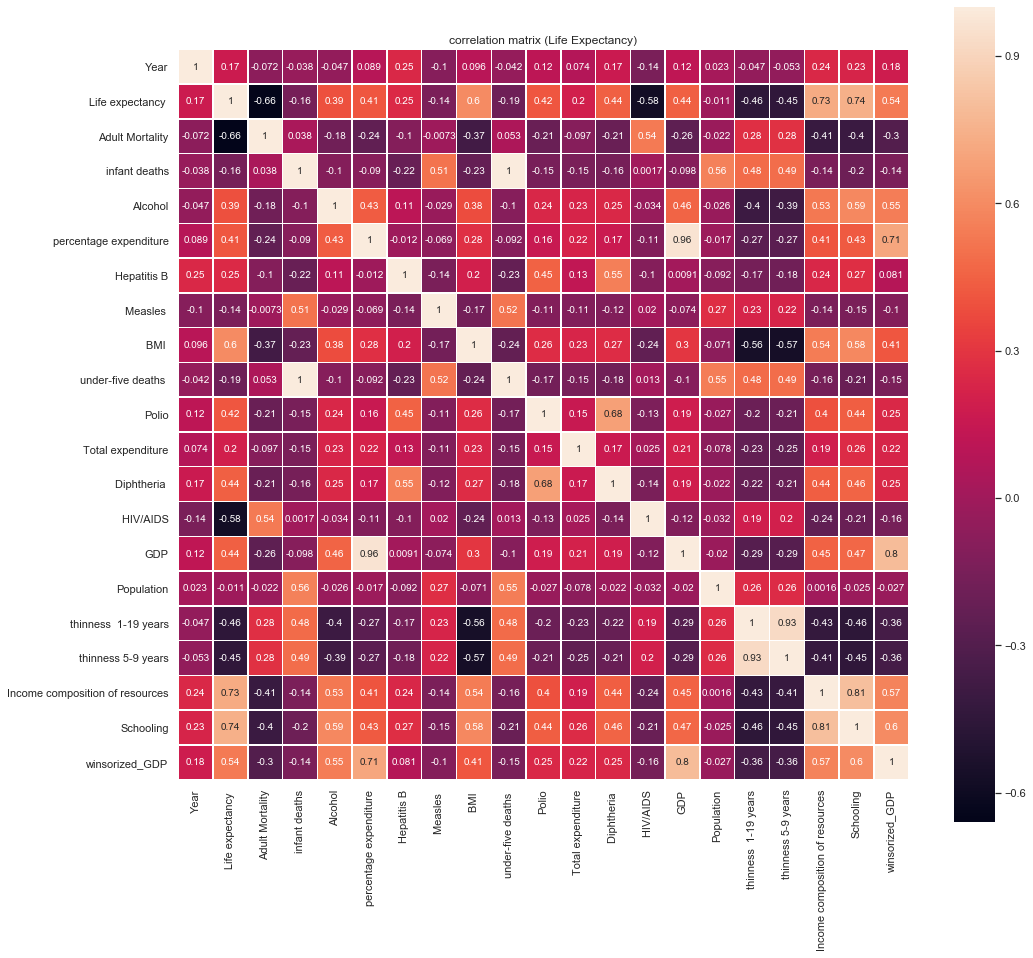

In [15]:
corrmat_lifeexpectancy = lifeexpectancy_df.corr()

plt.figure(figsize=(36,15))

plt.subplot(1,2,1)
sns.heatmap(corrmat_lifeexpectancy, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Life Expectancy)")

In [16]:
lifeexpectancy_df.groupby("Status").mean()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,winsorized_GDP
Status,,,,,,,,,,,,,,,,,,,,,
Developed,2007.000000,78.831579,83.094737,0.782456,10.372737,2842.875579,81.533333,415.298246,52.891228,0.968421,...,7.142281,94.098246,0.10000,20025.444768,8.169721e+06,1.377895,1.394035,0.839730,15.616491,8925.092441
Developing,2006.982374,66.164982,190.608108,42.625147,3.464827,324.238364,72.576968,3117.085194,33.671974,59.299060,...,5.695165,78.169800,2.63913,2942.020737,1.449051e+07,5.758284,5.836545,0.563888,10.973032,2472.208485


Text(0.5, 1.0, 'average Life Expectancy')

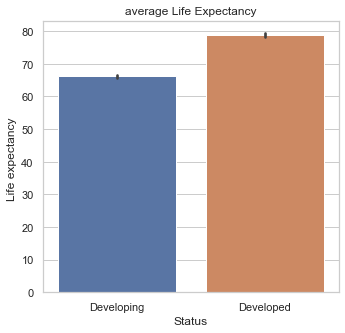

In [17]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(lifeexpectancy_df["Status"], lifeexpectancy_df["Life expectancy "])
plt.title("average Life Expectancy")

In [18]:
print("------------------------------------------------")
print("Comparisons for variable: Life Expectancy")
print("------------------------------------------------")
print("t-test between groups Developing and Developed:")
print(ttest_ind(lifeexpectancy_df[lifeexpectancy_df.Status == "Developing"]["Life expectancy "],
    lifeexpectancy_df[lifeexpectancy_df.Status == "Developed"]["Life expectancy "]))

------------------------------------------------
Comparisons for variable: Life Expectancy
------------------------------------------------
t-test between groups Developing and Developed:
Ttest_indResult(statistic=-22.92439377113489, pvalue=2.2504696584331004e-103)


The groupby table and the bar graph indicate that the average life expectancy is higher for developed nations than developing nations. The t-test then confirms that this difference is statistically significant. 

In [19]:
lifeexpectancy_df = pd.concat([lifeexpectancy_df, pd.get_dummies(lifeexpectancy_df["Status"])], axis=1)
lifeexpectancy_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,winsorized_GDP,Developed,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,584.259210,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,612.696514,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,631.744976,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,669.959000,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,63.537231,0,1
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,553.328940,0,1
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,445.893298,0,1
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,373.361116,0,1
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,369.835796,0,1
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,272.563770,0,1


Text(0.5, 1, 'correlation matrix (Life Expectancy)')

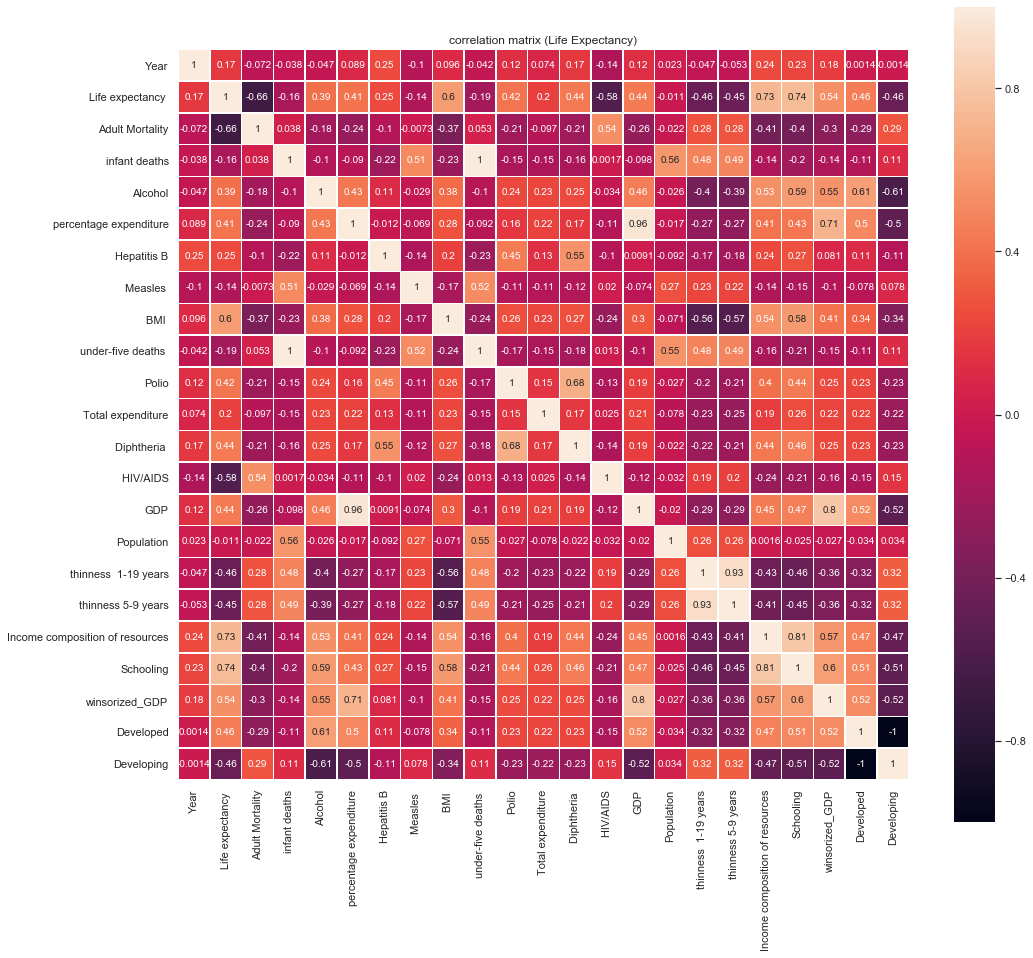

In [20]:
corrmat_lifeexpectancy = lifeexpectancy_df.corr()

plt.figure(figsize=(36,15))

plt.subplot(1,2,1)
sns.heatmap(corrmat_lifeexpectancy, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Life Expectancy)")

Text(0.5, 1.0, 'histogram of Life Expectancy (log transformed)')

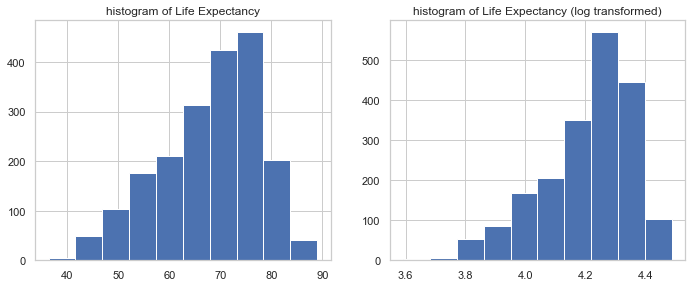

In [21]:
plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(lifeexpectancy_df["Life expectancy "])
plt.title("histogram of Life Expectancy")

plt.subplot(3, 3, 2)
plt.hist(np.log(lifeexpectancy_df["Life expectancy "]))
plt.title("histogram of Life Expectancy (log transformed)")

In [22]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(lifeexpectancy_df["Life expectancy "])
norm_stats = normaltest(lifeexpectancy_df["Life expectancy "])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(lifeexpectancy_df["Life expectancy "]))
norm_stats = normaltest(np.log(lifeexpectancy_df["Life expectancy "]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))



Jarque-Bera test statistics is 104.31353823378488 and p value is 0.0
Normality test statistics is 99.24799506031128 and p value is 2.8091291259316324e-22
Jarque-Bera test statistics is 240.21201162935398 and p value is 0.0
Normality test statistics is 186.04993280514162 and p value is 3.9789676856387254e-41


Text(0.5, 1.0, 'histogram of Life Expectancy (box-cox transformed)')

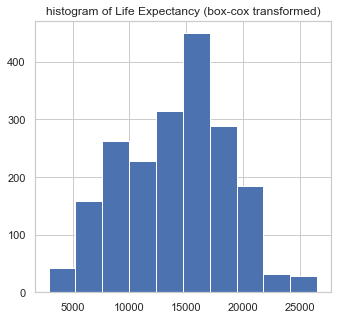

In [23]:
from scipy.stats import boxcox

Life_expectancy_boxcox,_ = boxcox(lifeexpectancy_df["Life expectancy "])


plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(Life_expectancy_boxcox)
plt.title("histogram of Life Expectancy (box-cox transformed)")

In [24]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(Life_expectancy_boxcox)
norm_stats = normaltest(Life_expectancy_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 29.198189209251666 and p value is 4.567660034648924e-07
Normality test statistics is 55.31523575486479 and p value is 9.737538173931148e-13


In [25]:
lifeexpectancy_df[["Life expectancy ", "Schooling", "Adult Mortality",]].corr()

,Life expectancy,Schooling,Adult Mortality
Life expectancy,1.000000,0.744703,-0.660529
Schooling,0.744703,1.000000,-0.404160
Adult Mortality,-0.660529,-0.404160,1.000000


Based on the correlation chart, the variables that I believe would be ideal for modeling to display their influence on life expectancy are schooling and adult mortality. One variable that was highly correlated to life expectancy that I chose not include was income composition of resources. This was due to that variable between high correlated to schooling as well.

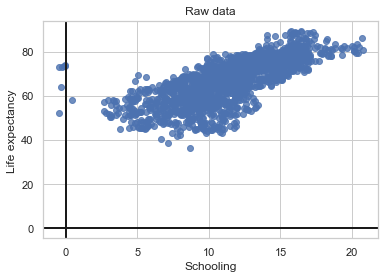

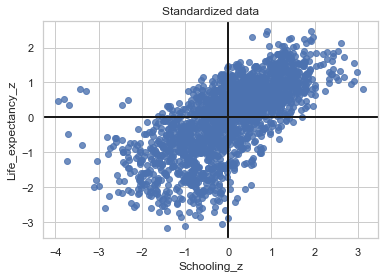

In [26]:
t = sns.regplot(
    'Schooling',
    'Life expectancy ',
    lifeexpectancy_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

lifeexpectancy_st_df = pd.DataFrame()
lifeexpectancy_st_df['Life_expectancy_z'] = (lifeexpectancy_df['Life expectancy '] - lifeexpectancy_df['Life expectancy '].mean()) / lifeexpectancy_df['Life expectancy '].std()
lifeexpectancy_st_df['Schooling_z'] = (lifeexpectancy_df['Schooling'] - lifeexpectancy_df['Schooling'].mean()) / lifeexpectancy_df['Schooling'].std()

t = sns.regplot(
    'Schooling_z',
    'Life_expectancy_z',
    lifeexpectancy_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()


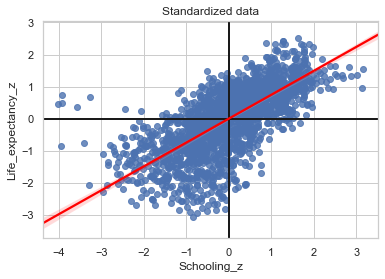

In [27]:
t = sns.regplot(
    'Schooling_z',
    'Life_expectancy_z',
    lifeexpectancy_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')

sns.regplot('Schooling_z', 
            'Life_expectancy_z',
            lifeexpectancy_st_df,
            scatter=False, 
            color="red")

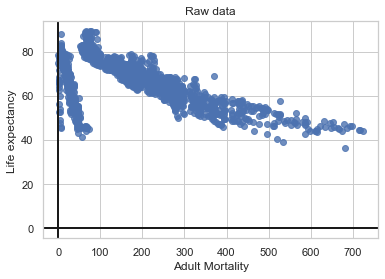

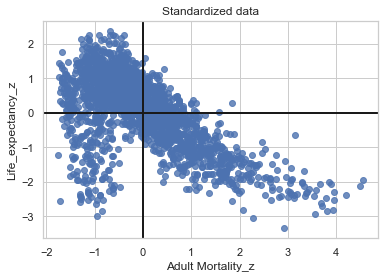

In [28]:
t = sns.regplot(
    'Adult Mortality',
    'Life expectancy ',
    lifeexpectancy_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

lifeexpectancy_st_df = pd.DataFrame()
lifeexpectancy_st_df['Life_expectancy_z'] = (lifeexpectancy_df['Life expectancy '] - lifeexpectancy_df['Life expectancy '].mean()) / lifeexpectancy_df['Life expectancy '].std()
lifeexpectancy_st_df['Adult Mortality_z'] = (lifeexpectancy_df['Adult Mortality'] - lifeexpectancy_df['Adult Mortality'].mean()) / lifeexpectancy_df['Adult Mortality'].std()

t = sns.regplot(
    'Adult Mortality_z',
    'Life_expectancy_z',
    lifeexpectancy_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()


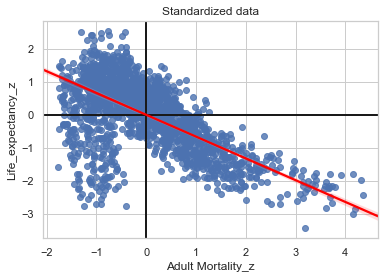

In [29]:
t = sns.regplot(
    'Adult Mortality_z',
    'Life_expectancy_z',
    lifeexpectancy_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')

sns.regplot('Adult Mortality_z', 
            'Life_expectancy_z',
            lifeexpectancy_st_df,
            scatter=False, 
            color="red")

The first model highlights a positive correlation between schooling and life expectancy. In other words, as schooling levels in a country increase life expectancy increases as well, as schooling levels decrese then life expectancy decreases as well. The second model highlights a negative correlation between adult mortality and life expectancy. In other words, as adult mortality levels decrease in a country, then life expectancy increases and as adult mortaliy levels increase, then life expectancy decreases.

Overall, these findings highlight three variables that influence life expectancy. The first, country status, was shown to be significantly related to life expectancy. The average life expectancy in developed countries was about 12 years higher than the average life expectancy in developing countries.

The other two variables, schooling and adult mortality were shown to be highly correlated to life expectancy. schooling was shown to have highest positive correlation with life expectancy. Meanwhile, adult mortality was shown to have the highest negative correlation with life expectancy.